In [1]:
#hide
!pip install -Uqq fastbook # instalando ou atualizando fastbook
import fastbook # carregando o módulo com ferramentas da fastai
fastbook.setup_book() # chamando função setup_book dentro do módulo fastbook que configura o notebook para os exemplos do fastAI

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
#hide
from fastai.vision.all import * # importando tudo do modulo fastai.vision
from fastbook import * # importando tudo do modulo fastbook

matplotlib.rc('image', cmap='Greys') # configurando o matplotlib para exibir imagens em tons de cinza.

# Under the Hood: Training a Digit Classifier

## Pixels: The Foundations of Computer Vision

## Sidebar: Tenacity and Deep Learning

## End sidebar

In [4]:
path = untar_data(URLs.MNIST_SAMPLE) 
#untar_data é a função que baixa o arquivo a patir da URL, descompacta e retorna um objeto tipo Path com o caminho para a pasta onde os dados foram extraídos.

In [5]:
#hide
Path.BASE_PATH = path 

# Path é uma classe fornecida pelo módulo pathlib
# BASE_PATH é um atributo de classe, ele é compartilhado entre todas as instâncias da classe Path. Ele define a pasta base padrão.
# Estamos dizendo que a a pasta base (raiz) padrão para os objetos criados Path () será o objeto path

In [6]:
path.ls()

# Chamando método .ls no objeto "path" que criamos, da classe Path, que mostra os arquivos e pastas dentro desse caminho. 

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [7]:
(path/'train').ls()

# Semelhante ao codigo acima, mas para a pasta 'train', dentro de path.

(#2) [Path('train/7'),Path('train/3')]

In [8]:
threes = (path/'train'/'3').ls().sorted() # atribui ao objeto threes lista de arquivos dentro da pasta 3
sevens = (path/'train'/'7').ls().sorted() # atribui ao objeto sevens lista de arquivos dentro da pasta 7
threes # mostra objeto threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png'),Path('train/3/10093.png'),Path('train/3/10097.png'),Path('train/3/10099.png'),Path('train/3/10116.png'),Path('train/3/10125.png'),Path('train/3/10137.png'),Path('train/3/10141.png'),Path('train/3/10144.png'),Path('train/3/10155.png'),Path('train/3/10161.png')...]

In [9]:
im3_path = threes[1] # acessando o segundo item de threes
im3 = Image.open(im3_path) # usando método open da classe Image no segundo item de threes
im3 # mostrando a imagem

In [10]:
array(im3)[4:10,4:10] 
# array(im3) - Função do Numpy que transforma imagem em matriz de valores numericos (array - utilizado para funções básicas) que representam pixels da imagem.
# [4:10,4:10] - Seleciona um pedaço da matrix

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [11]:
tensor(im3)[4:10,4:10]
# tensor(im3) - Função do fastai que transforma entrada em matriz de valores numericos (tensor - utilizado para modelos de Deeplearning) que representam pixels da imagem.

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [12]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

# Mostrando como (nesse caso) o tensor é uma matriz com os pixels da imagem. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## First Try: Pixel Similarity

In [13]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

# List comprehension que: 
# - Image.open(o)) for o in sevens: abre imagens na pasta definida pelo caminho sevens (em codigo anterior).
# - tensor () Transforma essas imagens em tensores
# - [] Cria uma lista com esses tensores. 

(6131, 6265)

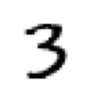

In [14]:
show_image(three_tensors[1]);

In [15]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

# torch.stack(seven_tensors) - Combina uma lista de tensores (cada um com shape [28, 28]) em um único tensor 3D com shape: [N, 28, 28]  ← N = número de imagens.
# .float(): Converte os valores dos pixels de inteiros (0–255) para ponto flutuante (float32)
# / 255: Normaliza os valores de pixel para o intervalo [0.0, 1.0], o que é essencial para redes neurais (melhora o desempenho e a estabilidade do treinamento).

torch.Size([6131, 28, 28])

In [16]:
len(stacked_threes.shape) # número de dimensões do tensor

3

In [17]:
stacked_threes.ndim # número de dimensões do tensor

3

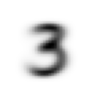

In [18]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

# mean(0): Faz a média ao longo do primeiro eixo. Para cada pixel pega o valor médio desse pixel em todas as imagens. O resultado é um único tensor de shape [28, 28].
# show_image: mostra esse tensor como uma imagem usando função do fastai

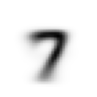

In [19]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

# Codigo semelhante ao anterior, para stacked_sevens.

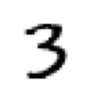

In [20]:
a_3 = stacked_threes[1]
show_image(a_3);

# Mostra a imagem do segundo arquivo de stacked_threes

In [21]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

# Medindo o quão diferente a imagem criada é da original:
# - a_3 - mean3: diferença pixel a pixel
# .abs(): valor absoluto da diferença (sem sinal)
# .mean(): média dessas diferenças
# **2: eleva ao quadrado (penaliza diferenças grandes)
# .sqrt(): raiz quadrada

(tensor(0.1114), tensor(0.2021))

In [22]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

# Codigo semelhante ao anterior, para a imagem criada pela média de pixels de stacked_seven

(tensor(0.1586), tensor(0.3021))

In [23]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

# F é um módulo, que contém funções de loss (funções de custo) usadas em PyTorch. Ele automatiza o código que fizemos no chunk anterior. 

(tensor(0.1586), tensor(0.3021))

### NumPy Arrays and PyTorch Tensors

Essa próxima parte exemplifica operações que podem ser feitas com Pytorch Tensors

In [25]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [26]:
arr  # numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [27]:
tns  # pytorch

tensor([[1, 2, 3],
        [4, 5, 6]])

In [28]:
tns[1]

tensor([4, 5, 6])

In [29]:
tns[:,1]

tensor([2, 5])

In [30]:
tns[1,1:3]

tensor([5, 6])

In [31]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [32]:
tns.type()

'torch.LongTensor'

In [33]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

## Computing Metrics Using Broadcasting

In [34]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

# Esse código mostra a preparação dos dados do set de validação de maneira semelhante ao que foi feito para o teste, explicado em código acima.

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [35]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

# Define uma função para medir o quão diferente a imagem criada é da original. Realizado para não ter que escrever a equação completa toda vez que ela for utilizada.
# a - b: Calcula a diferença pixel a pixel entre as duas imagens (ou batches de imagens).
# .abs(): Transforma todas as diferenças em valores positivos (módulo).
# .mean((-1, -2)): Calcula a média nas últimas duas dimensões, ou seja, altura e largura da imagem (28×28). Ou seja, calcula a média dos valores dos pixels em cada imagem. 

tensor(0.1114)

In [36]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

# valid_3_tens: É um tensor com várias imagens do dígito 3, do banco de dados de validação.
# mean3: É a média de todas as imagens de treino do número 3.Shape: [28, 28]
# mnist_distance: Aplica a função de distância, criada no codigo anterior, em todas as imagens do batch, comparando cada uma com mean3
# valid_3_dist será um tensor de shape [N], onde cada valor representa a distância média absoluta de uma imagem de validação para a imagem média mean3.

(tensor([0.1270, 0.1632, 0.1676,  ..., 0.1228, 0.1210, 0.1287]),
 torch.Size([1010]))

In [37]:
tensor([1,2,3]) + tensor(1)

tensor([2, 3, 4])

In [38]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [39]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

# Ela recebe uma imagem x (ou um batch de imagens) e compara: 
# Quão parecida ela é com o "3 médio" (mean3)
# Quão parecida ela é com o "7 médio" (mean7)
# Se for mais parecida com o 3, retorna True. Se for mais parecida com o 7, retorna False

In [40]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [41]:
is_3(valid_3_tens)

# Utiliza a função criada acima para averiguar se as imagens do set de validação do 3 são mais parecidas com o "3 médio" ou com o "7 médio"

tensor([ True, False, False,  ...,  True,  True, False])

In [42]:
accuracy_3s =  is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

# .float(): Converte os valores True → 1.0 e False → 0.0
# .mean(): Calcula a média dos 0s e 1s, que é igual à acurácia

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## Stochastic Gradient Descent (SGD)

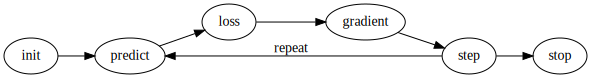

In [43]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [44]:
def f(x): return x**2

# Definindo uma função quadratica

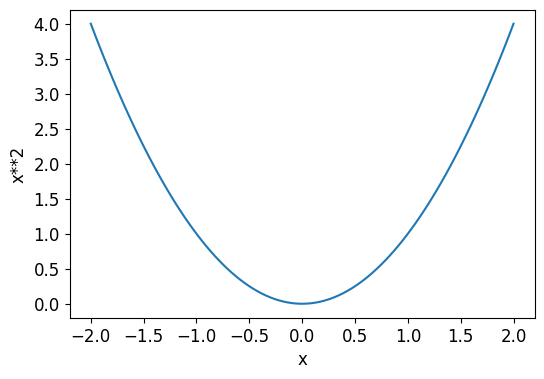

In [45]:
plot_function(f, 'x', 'x**2')

# Plotando a função quadratica

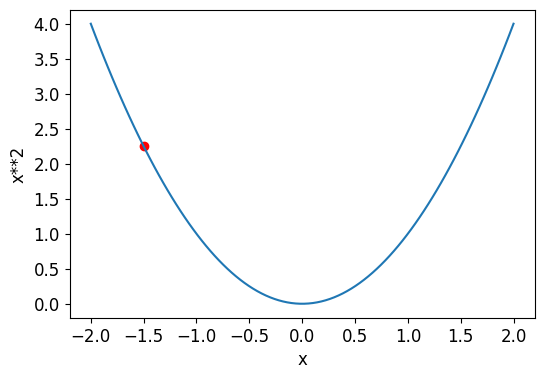

In [46]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

# Destaca um ponto no gráfico: x = -1,5; y = f(-1.5)

### Calculating Gradients

In [47]:
xt = tensor(3.).requires_grad_()

# tensor(3.): Cria um tensor escalar com o valor 3.0 (do tipo float).
# requires_grad_(): Diz ao PyTorch para rastrear esse tensor durante as operações, para que seja possível fazer backpropagation (cálculo de derivadas).

In [48]:
yt = f(xt)
yt

# Faz (3)**2 = 9. 
# Mostra histórico de autograd grad_fn=<PowBackward0>: Isso significa que é posivel obter a derivada de x**2, nossa função.

tensor(9., grad_fn=<PowBackward0>)

In [49]:
yt.backward()

# Calcula a derivada da função que gerou yt, em relação às variáveis que estão dentro de xt (e que têm requires_grad=True).

In [50]:
xt.grad

# Mostra o valor do gradiente que foi armazenado em xt. 

tensor(6.)

In [51]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

# Cada número pode agora participar de cálculos cujos gradientes serão rastreados

tensor([ 3.,  4., 10.], requires_grad=True)

In [52]:
def f(x): return (x**2).sum()

# Define função que: 
# Eleva cada elemento de x ao quadrado
# Soma todos os quadrados
# Retorna um único número (um escalar)

yt = f(xt)
yt

# Aplica a função a xt

tensor(125., grad_fn=<SumBackward0>)

In [53]:
yt.backward()
xt.grad

# Calcula os gradientes (derivadas) da função que gerou yt, em relação às variáveis que estão dentro de xt (e que têm requires_grad=True).

tensor([ 6.,  8., 20.])

### Stepping With a Learning Rate

### An End-to-End SGD Example

In [54]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

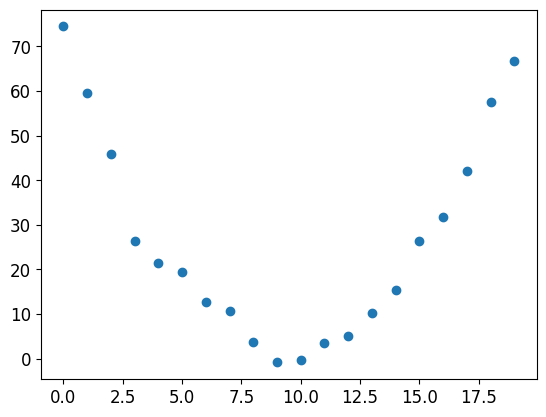

In [55]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

# Criando função matemática em forma de U, com ruído - número aleatório*3.
# Essa vai ser a função considerada a REAL, usada para comparação com as predições. 
# Plotando essa função

In [56]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

# Define uma função matemática f. 

In [57]:
def mse(preds, targets): return ((preds-targets)**2).mean()

# Define uma função do Python que calcula o mean squared error.
# preds - targets: Calcula o erro (diferença) entre a predição e o valor real.
# **2: Eleva o erro ao quadrado (para tornar tudo positivo e penalizar erros maiores).
# mean(): Calcula a média de todos os erros quadráticos.
# Isso dá um único valor que representa o quão "longe" em média suas previsões estão dos valores reais.

#### Step 1: Initialize the parameters

In [58]:
params = torch.randn(3).requires_grad_()

# torch.randn (3): Cria um tensor com 3 valores aleatórios.
# .requires_grad_(): Diz ao Pytorch rastrear os gradientes em relação a esses parâmetros

In [59]:
#hide
orig_params = params.clone()

# Cria uma cópia independente dos valores atuais de params. 

#### Step 2: Calculate the predictions

In [60]:
preds = f(time, params)

# Faz predição de velocidade usando a função definida, de acordo com time (definido antes) e com os parametros aleatórios gerados

In [61]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

# Criando uma função de visualização para compara: Valores reais (speed, em azul), Predições do modelo (preds, em vermelho)

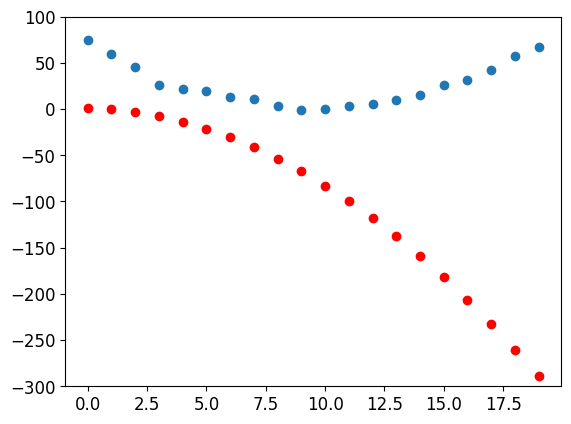

In [62]:
show_preds(preds)

#### Step 3: Calculate the loss

In [63]:
loss = mse(preds, speed)
loss

# Calcula mean squared error entre as predições (pred) e os valores reais (speed)

tensor(25823.8086, grad_fn=<MeanBackward0>)

#### Step 4: Calculate the gradients

In [64]:
loss.backward()
params.grad

# Calcula os gradientes (derivadas) da função que definiu loss (MSE), em relação às variáveis que estão dentro de params (e que têm requires_grad=True).

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [65]:
params.grad * 1e-5

# Multiplica os gradientes (derivadas) por um número pequeno, para definir o tamanho do passo na direção do gradiente que vamos dar (learning rate).

tensor([-0.5320, -0.0342, -0.0025])

In [66]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

#### Step 5: Step the weights. 

In [67]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

# 1. lr = 1e-5: Define o learning rate — a taxa de quanto você vai ajustar os parâmetros em cada passo.

# 2. params.data -= lr * params.grad.data: Esse é o passo de atualização dos parâmetros.
# params.grad contém os gradientes em relação a loss
# Multiplicando por lr, você obtém pequenos ajustes que reduzem o erro.
# .data é usado aqui para acessar diretamente os valores crus dos parâmetros, sem envolver o sistema de autograd do PyTorch.
# params.grad = None: Zera o gradiente para a próxima iteração. Isso é importante porque o PyTorch acumula os gradientes por padrão (útil para alguns métodos avançados). Se você não zerar, na próxima chamada de .backward(), os gradientes seriam somados com os antigos.

In [68]:
preds = f(time,params)
mse(preds, speed)

# f(time, params): Gera as predições atuais do modelo com os parâmetros ajustados.
# mse (preds, speed): Calcula nova MSE. 

tensor(5435.5356, grad_fn=<MeanBackward0>)

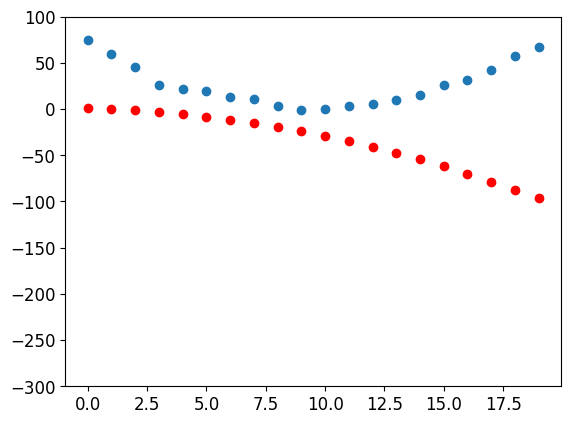

In [69]:
show_preds(preds)

In [71]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

# Criando função do Python que automatiza tudo que fizemos até agora:
# preds = f(time, params)	Calcula as predições atuais do modelo
# loss = mse(...)	Calcula o erro quadrático médio (MSE)
# loss.backward()	Calcula os gradientes dos parâmetros
# params.data -= ...	Aplica um passo de gradiente descendente
# params.grad = None	Zera os gradientes para a próxima iteração
# if prn: ...	imprime o valor do erro atual (loss)
# return preds	Retorna as predições atuais após o passo

#### Step 6: Repeat the process 

In [72]:
for i in range(10): apply_step(params)

# Repete os procedimento da função anterior 10 vezes e imprime a loss após cada procedimento
# A loss diminui a cada procedimento

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


In [73]:
#hide
params = orig_params.detach().requires_grad_()

# Essa linha reinicializa os parametros (params) com valores originais
# orig_params: Contém os valores salvos antes do treinamento (a inicialização aleatória original).
# detach(): Cria um novo tensor que não está ligado ao grafo computacional anterior. Isso evita que o PyTorch tente rastrear gradientes antigos e mantenha dependências desnecessárias.
# requires_grad_(): Ativa novamente o rastreamento de gradientes para params, como é necessário para o backward() funcionar corretamente.

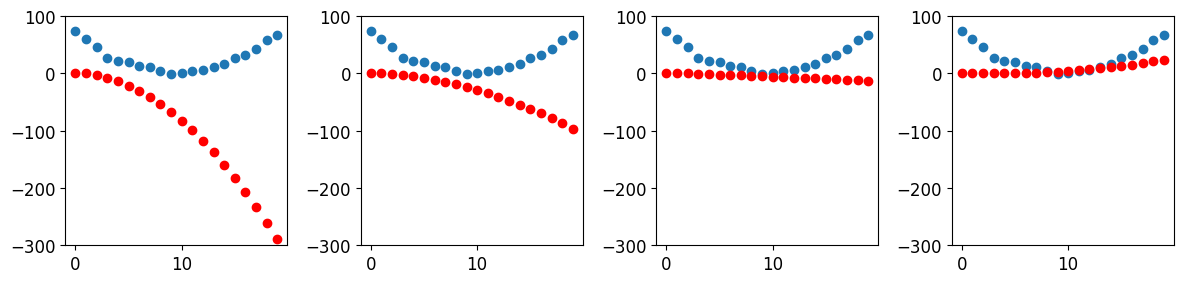

In [74]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

# Cria gráfico mostrando a melhora das predições com ciclos de treinamento

#### Step 7: stop

### Summarizing Gradient Descent

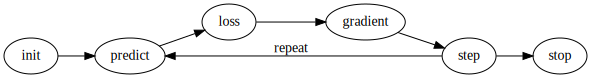

In [75]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## The MNIST Loss Function

In [90]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

# torch.cat([stacked_threes, stacked_sevens]): Está concatenando (empilhando) todas as imagens de 3 e 7. No final o shape vira [2N, 28, 28], ou seja todas as imagens foram empilhadas no mesmo tensor. 
# .view(-1, 28*28): Faz o 'flatten': Transforma cada imagem 28x28 em um vetor de tamanho 784 (28×28). O shape final é [2N, 784]
# Objetivo: redes neurais lineares (e muitos classificadores tradicionais) esperam vetores de entrada, não imagens 2D.

In [91]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

# Criação dos rótulos (train_y):
# [1]*len(threes) → Cria uma lista com 1 para cada imagem de "3" (ou seja, todas as imagens de "3" terão rótulo 1)
# [0]*len(sevens) → Cria uma lista com 0 para cada imagem de "7" (ou seja, todas as imagens de "7" terão rótulo 0)

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [78]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

# zip(train_x, train_y): Junta cada exemplo de entrada com seu rótulo correspondente.
# list(...): Converte o zip para uma lista, criando um dataset estilo PyTorch.

# dset[0]: Pegando o primeiro item
# x: Um vetor com os 784 pixels da primeira imagem (shape [784])
# y: O rótulo (tensor escalar ou tensor 1D com 1 elemento)

(torch.Size([784]), tensor([1]))

In [79]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

# COdigos iguais os apresentados acima, mas para dataset de validação

In [81]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

# torch.randn(size): Cria um tensor com valores aleatórios de uma distribuição normal (média 0, desvio 1)
# * std: Ajusta a escala dos valores (controle do desvio padrão inicial dos pesos)
# .requires_grad_()	Faz com que o PyTorch rastreie os gradientes desses parâmetros (essencial para treino com backpropagation)

In [86]:
weights = init_params((28*28,1))

# Cria um vetor de pesos com 784 valores aleatórios

In [88]:
bias = init_params(1)

# Cria um tensor escalar para o bias com um único valor aleatório (shape [1]), com requires_grad=True para que ele também seja ajustado durante o treinamento.

In [89]:
(train_x[0]*weights.T).sum() + bias

# Fazendo manualmente o cálculo de uma predição individual de um modelo linear (tipo perceptron) para um único exemplo (a primeira imagem).
# train_x[0] * weights.T: Faz o produto elemento a elemento entre os pixels da imagem (train_x[0]) e os pesos (weights)
# .sum(): Soma tudo.
# + bias: Soma o bias. 

tensor([5.3335], grad_fn=<AddBackward0>)

In [94]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds.shape, preds


# 1. Definição do "modelo" (forward pass):
# xb: Batch de entradas (todos os exemplos)
# weights: Os pesos aprendíveis do modelo (shape [784, 1])
# bias: O bias (shape [1])
# @: Faz o produto de matriz-vetor entre todos os exemplos e os pesos

# 2. Fazendo a primeira predição
# Resultado: tensor [N, 1], onde cada linha é uma predição para uma imagem

(torch.Size([12396, 1]),
 tensor([[ 5.3335],
         [-7.4951],
         [-6.8308],
         ...,
         [13.2048],
         [ 4.6467],
         [ 4.5761]], grad_fn=<AddBackward0>))

In [95]:
corrects = (preds>0.0).float() == train_y
corrects

# (preds > 0.0): Isso cria um tensor booleano, indicando se cada predição foi maior que 0.
# .float(): Converte o tensor booleano (True/False) para números: True → 1.0 e False → 0.0
# Agora compara as predições (0 ou 1) com os rótulos reais (train_y). Isso gera outro tensor booleano indicando se o modelo acertou cada exemplo.

tensor([[ True],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]])

In [96]:
corrects.float().mean().item()

# Calculando a acurácia média como um número puro:
# corrects: Tensor de booleanos (True/False para cada exemplo)
# .float():	Converte para números: 1.0 para acerto, 0.0 para erro
# .mean():	Calcula a média dos acertos: percentual de acertos
# .item()	Converte o resultado de tensor escalar para um float Python puro


0.1800580769777298

In [97]:
with torch.no_grad(): weights[0] *= 1.0001

# Testando: "E se eu aumentasse só esse peso específico um pouquinho? O que aconteceria na saída/predição/erro?"
# with torch.no_grad(): Durante esse trecho de código, não rastreie operações de autograd (gradientes).
# weights[0] *= 1.0001: Aqui você está alterando diretamente o primeiro peso (weights[0]), multiplicando ele por 1.0001

In [98]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

# Calculando novamente a acurácia, depois de ter feito aquela pequena alteração no peso.

0.1800580769777298

In [99]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [101]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

# Essa função calcula uma versão simples de loss para classificação binária, baseada na seguinte lógica: 
# 1 (classe positiva)	1 - predição → Quanto falta para a predição ser 1
# 0 (classe negativa)	predição → Quanto falta para a predição ser 0

# Sintaxe do torch.where (condicao, valor_se_verdadeiro, valor_se_falso): 
# Se a condição for verdadeira: usa o primeiro valor
# Se for falsa: usa o segundo valor

# Nesse caso específico...
# torch.where(targets == 1, 1 - predictions, predictions)
# Para exemplos onde o target é 1: Calcula 1 - prediction → Queremos que a predição seja próxima de 1.
# Para exemplos onde o target é 0:	Calcula apenas prediction → Queremos que a predição seja próxima de 0.
# .mean() → Faz a média sobre todos os exemplos.

In [102]:
torch.where(trgts==1, 1-prds, prds)

# Exemplo de uso da função de loss definida acima, sem a média. 

tensor([0.1000, 0.4000, 0.8000])

In [103]:
mnist_loss(prds,trgts)

# Exemplo de uso da função de loss definida acima, fazendo a média no final. 

tensor(0.4333)

In [104]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

# Exemplo de uso da função de loss definida acima, utilizando outras predições.

tensor(0.2333)

### Sigmoid

In [105]:
def sigmoid(x): return 1/(1+torch.exp(-x))

# Definindo uma função sigmoide: Ela pega qualquer número real (positivo ou negativo) e transforma em um valor entre 0 e 1, criando uma curva em "S".
# Para x≫10 (muito positivo): A sigmoide fica muito perto de 1.
# Para x≪−10 (muito negativo): A sigmoide fica muito perto de 0.

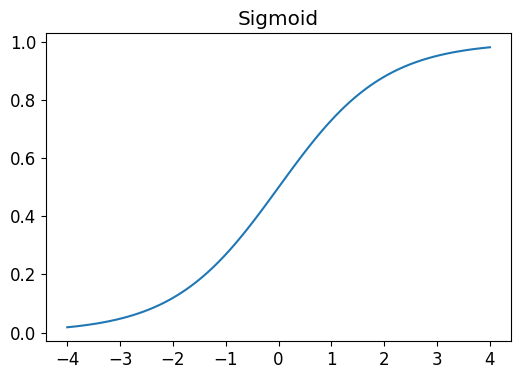

In [106]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [107]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

# Ajustando a função de loss para incluir um sigmoide dentro dela. 
# Isso torna mais facil a comparação com os rotulos, que estao em 0 e 1.

### SGD and Mini-Batches

In [108]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

# coll = range(15): Cria uma coleção de 15 elementos:
# Cria um DataLoader que vai pegar os dados de coll em batches de tamanho 5. Com shuffle=True, o PyTorch embaralha a ordem dos elementos antes de criar os batches.
# Converte o DataLoader em uma lista de batches, só pra você ver como ele agrupou os dados.

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [109]:
ds = L(enumerate(string.ascii_lowercase))
ds

# Criando um dataset de exemplo, combinando índices e letras do alfabeto
# string.ascii_lowercase: Isso é uma string Python padrão que contém todas as letras minúsculas do alfabeto
# enumerate(string.ascii_lowercase): Cria um iterador que dá um índice junto com cada letra, assim
# L(...): Isso transforma o resultado num objeto de lista especial da FastAI (L), que tem vários métodos extras (como map, zip, etc.), mas que se comporta como uma lista normal.

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

In [110]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

# Criando um dataloader usando dataset de exemplo anterior.

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

## Putting It All Together

In [111]:
weights = init_params((28*28,1))
bias = init_params(1)

# Utilizando função init_parameters, definida acima: 
# Cria uma matriz de pesos aleatórios com shape [784, 1]. Com requires_grad=True → o PyTorch vai calcular gradientes desses pesos durante o treinamento.
# Faz o mesmo com o  o bias (intercepto) como um escalar treinável (com shape [1]).

In [113]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

# Cria um DataLoader a partir do seu dataset dset (definido acima, que contém os pares (x, y) → entrada e rótulo).
# first(dl): Isso pega o primeiro batch
# xb, yb = first(dl) Faz unpacking do batch: xb → Contém os inputs (as imagens achatadas) (Shape esperado: [256, 784]). yb → Contém os rótulos (targets) (Shape esperado: [256, 1]).

(torch.Size([256, 784]), torch.Size([256, 1]))

In [114]:
valid_dl = DataLoader(valid_dset, batch_size=256)

# Faz a mesma coisa do codigo acima para o dataset valid_dset

In [115]:
batch = train_x[:4]
batch.shape

# train_x[:4] → Pega as primeiras 4 imagens achatadas do dataset de treino. Como cada imagem tem 784 pixels (28×28 achatado)

torch.Size([4, 784])

In [116]:
preds = linear1(batch)
preds

# Passa mini-batch de 4 imagens pela função do modelo (linear1) para gerar as predições (logits).
# Lembrando a funçãp linear1: def linear1(xb): return xb @ weights + bias. Weights e bias foram definidos acimas.

tensor([[9.3125],
        [9.4462],
        [2.8174],
        [3.2292]], grad_fn=<AddBackward0>)

In [117]:
loss = mnist_loss(preds, train_y[:4])
loss

# Calculando a loss (definido previamente) para o mini-batch com as primeiras 4 imagens. 
# preds: São os logits que você acabou de calcular para o mini-batch de 4 imagens (Shape: [4, 1]). 
# train_y[:4] São os rótulos reais dos 4 primeiros exemplos (Shape: [4, 1]), contendo valores 0 ou 1 (as classes)

tensor(0.0237, grad_fn=<MeanBackward0>)

In [118]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

# Fazendo o backpropagation, ou seja, calcular os gradientes da loss em relação aos parâmetros treináveis: weights e bias.
# loss.backward(): Calcula os gradientes da loss com relação a todos os tensores que têm requires_grad=True (ou seja, weights.grad e bias.grad).
# weights.grad.shape: Retorna o shape dos gradientes dos pesos.
# weights.grad.mean(): Calcula a média dos gradientes de todos os pesos, só pra ter uma ideia geral de "quão grandes" estão sendo os ajustes.
# bias.grad: Mostra o gradiente da loss em relação ao bias.

(torch.Size([784, 1]), tensor(-0.0035), tensor([-0.0225]))

In [120]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

# Criando uma função que encapsula o cálculo dos gradientes, deixando o código mais organizado e reutilizável.

# Entradas: 
# xb → O batch de entradas (imagens achatadas)
# yb → O batch de rótulos reais
# model → Uma função que calcula as predições (no seu caso, a linear1, por exemplo).

# preds = model(xb): Faz o forward pass: Calcula as predições (logits) para o batch.
# loss = mnist_loss(preds, yb): Calcula a função de perda (loss), comparando os logits com os rótulos verdadeiros.
# loss.backward(): Faz o backpropagation automático, calculando os gradientes da loss em relação a todos os parâmetros treináveis do modelo (por exemplo: weights.grad e bias.grad).

In [121]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

# calc_grad(batch, train_y[:4], linear1):
# Calculou as predições para o mini-batch (batch).
# Calculou a loss usando sua mnist_loss.
# Fez o backward, preenchendo os gradientes de weights e bias.

(tensor(-0.0070), tensor([-0.0450]))

In [122]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

# Mesmo codigo que o anterior. Usado para mostrar que se os gradientes não forem zerados eles serão acumulados para a próxima chamada de .backward

(tensor(-0.0106), tensor([-0.0675]))

In [123]:
weights.grad.zero_()
bias.grad.zero_();

# Zera todos os gradientes dos pesos, para evitar acúmulo na próxima chamada de .backward()

In [137]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

# for xb, yb in dl: 
# Percorre todos os batches do DataLoader dl.
# Em cada batch: xb → Batch de entradas (imagens achatadas). yb → Batch de rótulos (0 ou 1)

# calc_grad(xb, yb, model)
# Usando função definida acima ele faz: forward, loss, backward para esse batche.

# for p in params: Para cada parâmetro (peso ou bias):
# p.data -= p.grad * lr: Move os parâmetros na direção oposta ao gradiente, com o tamanho de passo controlado pela taxa de aprendizado (lr)
# p.grad.zero_(): era os gradientes, para evitar acúmulo na próxima iteração

In [138]:
(preds>0.0).float() == train_y[:4]

#  verificando, para as primeiras 4 predições do modelo, quais exemplos o modelo acertou ou errou. 

tensor([[True],
        [True],
        [True],
        [True]])

In [139]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

# criando uma função para calcular a acurácia média em um batch, já levando em conta que as entradas são logits e precisam passar por uma sigmoid antes de comparar com os rótulos.

# preds = xb.sigmoid()
# Converte os logits (xb) em probabilidades entre 0 e 1, aplicando a sigmoid.

# (preds > 0.5)
# Aplica um limiar de 0.5:
# Se a probabilidade for > 0.5 → classe 1
# Se ≤ 0.5 → classe 0

# == yb
# Compara as predições binárias (0 ou 1) com os rótulos reais (yb), que devem estar no formato 0 ou 1 também.

# correct.float().mean()
# Converte o resultado para float (True → 1.0, False → 0.0)

# Faz a média, resultando na acurácia (proporção de acertos) naquele batch.

In [140]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [141]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

# Criando uma função para calcular a acurácia média em toda a validação (epoch de validação):

# Para cada batch (xb, yb) da validação (definido em codigo acima em um dataloader chamado in valid_dl):
# Faz o forward pass (model(xb))
# Calcula a acurácia no batch usando batch_accuracy
# Resultado: accs vira uma lista de tensores com a acurácia de cada batch.

# torch.stack(accs): Empilha as acurácias dos batches num tensor único.

# Calcula a média final: Isso te dá a acurácia média da validação inteira.

In [142]:
validate_epoch(linear1)

# Calculando a acurácia média do seu modelo (linear1) em todo o conjunto de validação. 

0.5683

In [144]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

# lr = 1. Define a taxa de aprendizado (learning rate).

# params = weights, bias: Agrupa os parâmetros treináveis numa tupla, pra facilitar o loop de atualização.

# Faz uma época completa de treino:
# Para cada batch do dl (DataLoader de treino):
# Calcula gradientes (calc_grad)
# Atualiza os pesos e o bias com gradiente descendente
# Zera os gradientes para o próximo batch

# validate_epoch(linear1): Calcula a acurácia média em todos os batches de validação, com os pesos atualizados.


0.8373

In [145]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9091 0.934 0.9437 0.9506 0.955 0.9594 0.9618 0.9618 0.9637 0.9652 0.9676 0.9691 0.9706 0.9706 0.9706 0.9711 0.9715 0.972 0.972 0.9735 

### Creating an Optimizer

In [ ]:
linear_model = nn.Linear(28*28,1)

In [ ]:
w,b = linear_model.parameters()
w.shape,b.shape

In [ ]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

## Adding a Nonlinearity

In [ ]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [ ]:
plot_function(F.relu)

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [ ]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(40, 0.1)

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [ ]:
learn.recorder.values[-1][2]

### Going Deeper

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

## Jargon Recap

## Questionnaire

1. How is a grayscale image represented on a computer? How about a color image?
1. How are the files and folders in the `MNIST_SAMPLE` dataset structured? Why?
1. Explain how the "pixel similarity" approach to classifying digits works.
1. What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.
1. What is a "rank-3 tensor"?
1. What is the difference between tensor rank and shape? How do you get the rank from the shape?
1. What are RMSE and L1 norm?
1. How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop?
1. Create a 3×3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers.
1. What is broadcasting?
1. Are metrics generally calculated using the training set, or the validation set? Why?
1. What is SGD?
1. Why does SGD use mini-batches?
1. What are the seven steps in SGD for machine learning?
1. How do we initialize the weights in a model?
1. What is "loss"?
1. Why can't we always use a high learning rate?
1. What is a "gradient"?
1. Do you need to know how to calculate gradients yourself?
1. Why can't we use accuracy as a loss function?
1. Draw the sigmoid function. What is special about its shape?
1. What is the difference between a loss function and a metric?
1. What is the function to calculate new weights using a learning rate?
1. What does the `DataLoader` class do?
1. Write pseudocode showing the basic steps taken in each epoch for SGD.
1. Create a function that, if passed two arguments `[1,2,3,4]` and `'abcd'`, returns `[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]`. What is special about that output data structure?
1. What does `view` do in PyTorch?
1. What are the "bias" parameters in a neural network? Why do we need them?
1. What does the `@` operator do in Python?
1. What does the `backward` method do?
1. Why do we have to zero the gradients?
1. What information do we have to pass to `Learner`?
1. Show Python or pseudocode for the basic steps of a training loop.
1. What is "ReLU"? Draw a plot of it for values from `-2` to `+2`.
1. What is an "activation function"?
1. What's the difference between `F.relu` and `nn.ReLU`?
1. The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?

### Further Research

1. Create your own implementation of `Learner` from scratch, based on the training loop shown in this chapter.
1. Complete all the steps in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way.